## Housing Company Price Prediction - Advanced Regression

#### Problem Statement:

A US-based Surprise housing company has decided to enter the Australian market to start their business. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the 'train.CSV' file.

The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in the properties or not.

The housing company wants to know:

-Variables which are significant in predicting the price of a house

-How well those variables describe the price of a house

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Scope of Analysis:

Build a regression model using regularisation to predict actual value of properties with the available independent variables. This model will be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Approach:

1.Understanding and exploration of the data

2.Data cleaning and visualizing

3.Preparing the data for modelling

4.Model building and evaluation

5.Inference

#### Source of Data:

Data are provided in the file “train.csv”. The "train.csv" file contains private data coming from the Surprise housing company. No additional details are expected to be analyzed as part of the study.

#### Importing necessary Libraries for the Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1. Understanding and exploration of the data

In [2]:
# read the data from input file 'train.csv'
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.shape

(1460, 81)

In [4]:
# Checking columns list
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking for null values in dataset
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Checking for % of null items in dataset
round(100*(house.isnull().sum()/len(house.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [8]:
# To get the description of the dataset
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


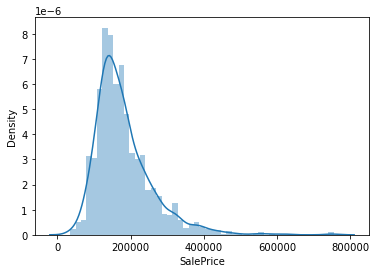

In [9]:
# target variable: price of car
sns.distplot(house['SalePrice'])
plt.show()

Above plot shows distribution of sale price of houses. The sale price of most of the houses are in the range of 100000 to 200000

In [10]:
# As number of variables are more, data in the heat map will be overlapping and not be clear
# lets use correlation matrix for clarity of data
cor = house.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


From the above correlation data, it is understood that most of the variables are not very closely correlated with Sale price of houses. There are a few variables such as 'OverallQual', 'GrLivArea', 'TotBsmtSF' 'Fullbath','GarageCars', 'GarageArea' which are closely correlated with target variable 'SalePrice'. 

Also, there are multicollinearity among a few variables. These variables need to be addressed during model building.

### 2. Data Cleaning and Visualizing

We will follow data cleaning. 

We have seen that there are missing values in the dataset. We have also seen that values of variables are not in the required format for a few variables and the data should be updated

#### Removing or Imputing null values in categorical data

In [11]:
# Checking for null values in categorical variable columns
house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Out of all categorical columns (shown above), values are missing in variables 'MasVnrType' and 'Electrical'.

As the number of rows with the missing values are very less in the variables(MasVnrType - 8 rows), N/A is imputed with 'None' to simplify.

In column 'Electrical', one missing value will be imputed with mode value.

In all other categorical columns, N/A means 'None'as per the given data dictionary. So N/A will be imputed with 'None'.

In [12]:
# Replacing N/A with 'None' in the above categorical columns as given below

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'):
    house[col]=house[col].fillna('None')


In [13]:
# Getting mode value for variable electrical
house['Electrical'].mode()[0]

'SBrkr'

In [14]:
# Imputing mode value for variable electrical
house['Electrical'] = house['Electrical'].fillna('SBrkr')

In [15]:
# Checking for null value presence in categorical variable columns
house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

After cleaning, there is no null value in the categorical variable columns

#### Removing the categorical variable columns which have more than 85% of data associcated with one value

Lets remove categorical variable column having one value repeated more 1241 (85% of 1460) to avoid skewing of data

In [16]:
# Dropping the columns which have more than 85% values associated to a specific one value

def getHighCategoricalValueCounts():
    column=[]
    categorical_columns = house.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house[col].value_counts().max()>= 1241):
            column.append(col)
    return column
cat_column_removed = getHighCategoricalValueCounts()

house.drop(cat_column_removed, axis=1, inplace = True)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


#### Removing or Imputing null values in numerical data

In [17]:
# Checking for null values in numerical variable columns
house.select_dtypes(include=['int64','float']).isnull().sum()[house.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [18]:
# Checking details of the above three numerical variable columns for imputing
house[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [19]:
# Imputing null values in the below numerical variable columns with median value
house['LotFrontage']=house['LotFrontage'].replace(np.nan, house['LotFrontage'].median())
house['MasVnrArea']=house['MasVnrArea'].replace(np.nan, house['MasVnrArea'].median())


In [20]:
# Imputing null values for variable 'GarageYrBlt' with 0 now as this variable needs further cleaning
house['GarageYrBlt']=house['GarageYrBlt'].fillna(0)
house['GarageYrBlt']=house['GarageYrBlt'].astype(int)

In [21]:
# Creating a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house['IsRemodelled'] = house.apply(checkForRemodel, axis=1)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [22]:
# Creating a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house['BuiltOrRemodelAge'] = house.apply(getBuiltOrRemodelAge, axis=1)
house.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [23]:
# Creating a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house['OldOrNewGarage'] = house['GarageYrBlt'].apply(getGarageConstructionPeriod)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [24]:
# As new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt have been created, 
# we can drop these columns as we would only be using the derived columns for further analysis

house = house.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis = 1)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,Normal,250000,0,8,1


#### Removing the numerical variable columns which have more than 85% of data associcated with one value

Lets remove categorical variable column having one value repeated more 1241 (85% of 1460) to avoid skewing of data

Dropping columns which have more than 85% values associated to a specific value. We will also drop MoSold as we will not be using that for further analysis

In [25]:
def getHighNumericalValueCounts():
    column = []
    numerical_columns = house.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.drop(['MoSold'], axis = 1, inplace = True)

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [26]:
# Checking for percentage of null values in all columns

percent_missing = round(100*(house.isnull().sum()/len(house.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


There are no null values in the data

In [27]:
# Checking for duplicate rows in the dataset
house[house.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


No duplicate row is present in the dataset

#### Handling outlier in the dataset

In [28]:
# Checking outliers at 25%,50%,75%,90%,95% and above

house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


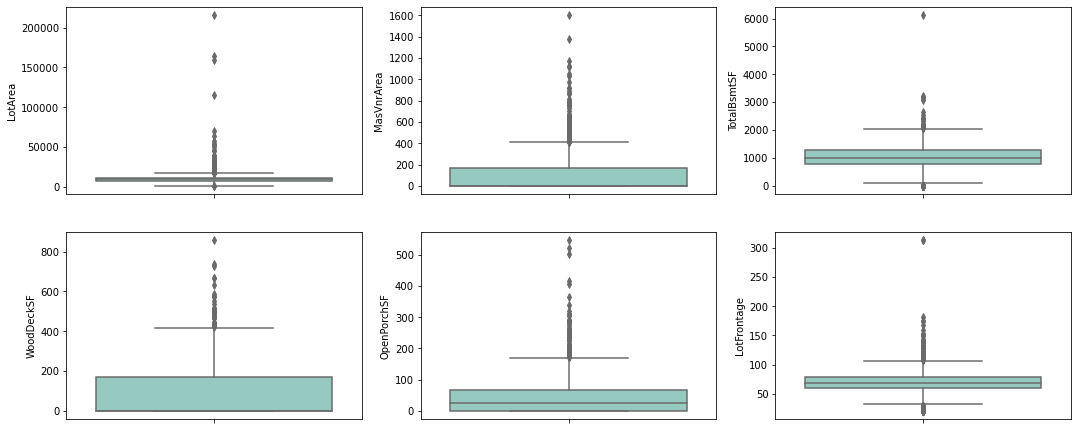

In [29]:
# Checking the outliers in the numerical variable columns using box plot

plt.figure(figsize=(18, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house)
plt.subplot(5,3,6)
sns.boxplot(y = 'LotFrontage', palette='Set3', data = house)
plt.show()

The above box plots show outlier in the numberical variables.

In [30]:
# Removing Outliers

# Removing values beyond 99% for LotArea

nn_quartile_LotArea = house['LotArea'].quantile(0.99)
house = house[house["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 99% for MasVnrArea

nn_quartile_MasVnrArea = house['MasVnrArea'].quantile(0.99)
house = house[house["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = house['TotalBsmtSF'].quantile(0.99)
house = house[house["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = house['WoodDeckSF'].quantile(0.99)
house = house[house["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = house['OpenPorchSF'].quantile(0.99)
house = house[house["OpenPorchSF"] < nn_quartile_OpenPorchSF]


In [31]:
# Determining the percentage of data retained
print(round(100*(len(house)/1460),2))

94.93


As data set has limited data, further removal of outlier is limited

#### Visualizing the data of a few selected variables

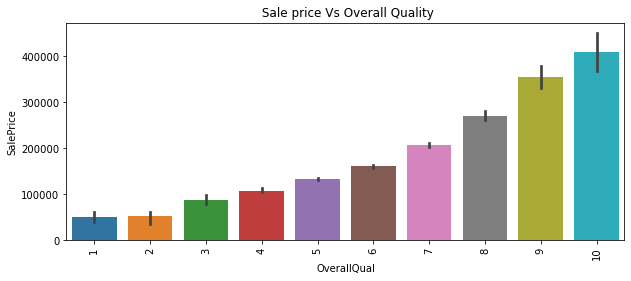

In [32]:
# Plotting 'Sale Price' Vs 'Overall Quality'
plt.figure(figsize=(10,4))
sns.barplot(x='OverallQual', y='SalePrice', data=house)
plt.title(" Sale price Vs Overall Quality")
plt.xticks(rotation=90)
plt.show()

From the above plot, it is understood that sale price increase with increase in overall quality

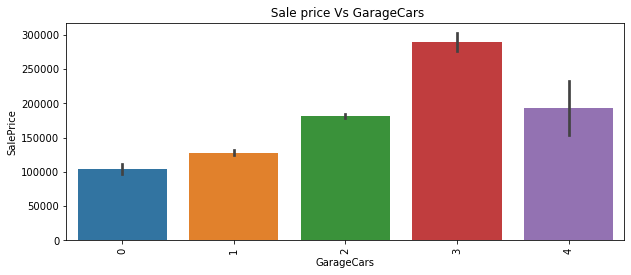

In [33]:
# Plotting 'Sale Price' Vs 'size of Garage in car capacity'
plt.figure(figsize=(10,4))
sns.barplot(x='GarageCars', y='SalePrice', data=house)
plt.title(" Sale price Vs GarageCars")
plt.xticks(rotation=90)
plt.show()

From the above plot, it is understood that sale price is highest with GarageCars of 3

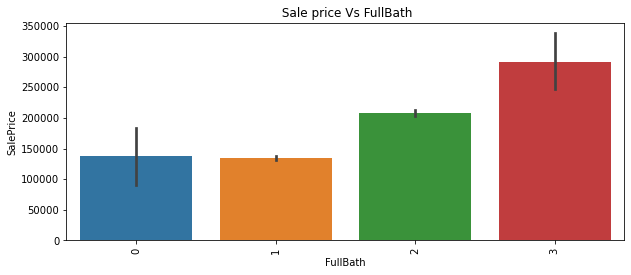

In [34]:
# Plotting 'Sale Price' Vs 'FullBath'
plt.figure(figsize=(10,4))
sns.barplot(x='FullBath', y='SalePrice', data=house)
plt.title(" Sale price Vs FullBath")
plt.xticks(rotation=90)
plt.show()

From the above plot, it is understood that sale price is highest with FullBath of 3

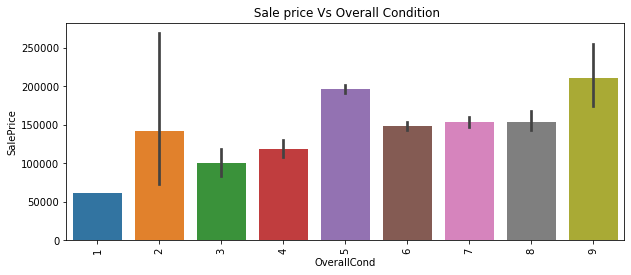

In [35]:
# Plotting 'Sale Price' Vs 'Overall condition'
plt.figure(figsize=(10,4))
sns.barplot(x='OverallCond', y='SalePrice', data=house)
plt.title(" Sale price Vs Overall Condition")
plt.xticks(rotation=90)
plt.show()

From the above plot, it is understood that sale price is high for overall condition of 5 and 9

<Figure size 720x360 with 0 Axes>

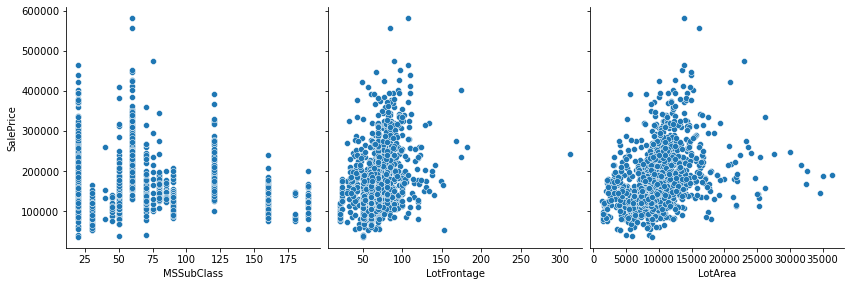

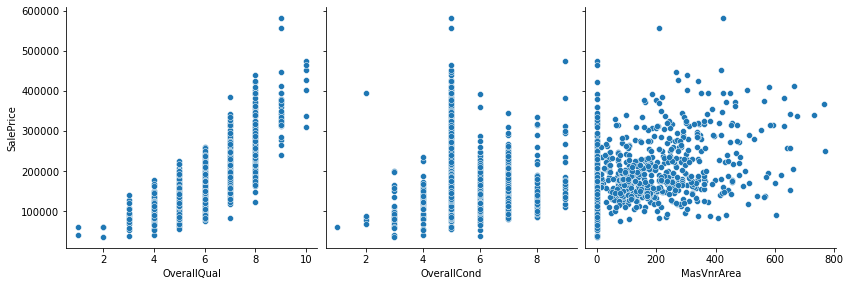

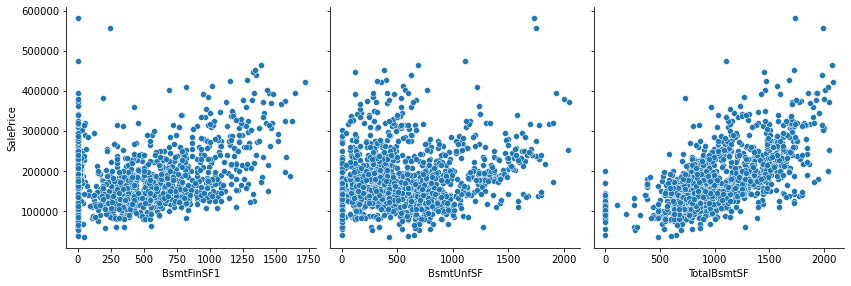

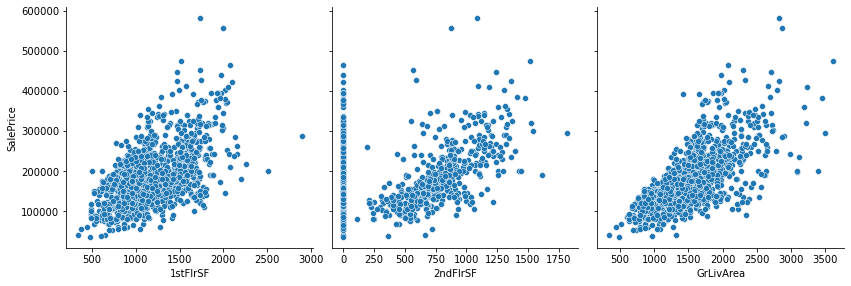

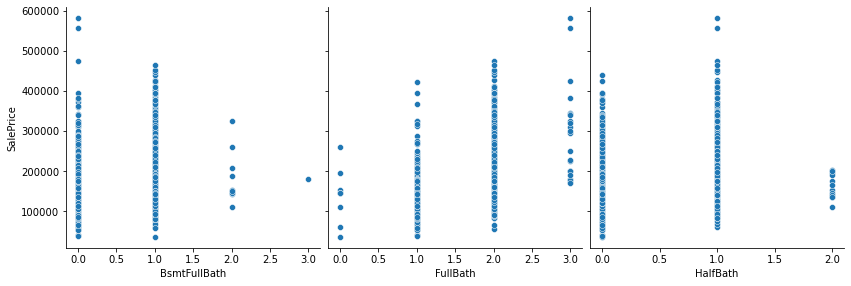

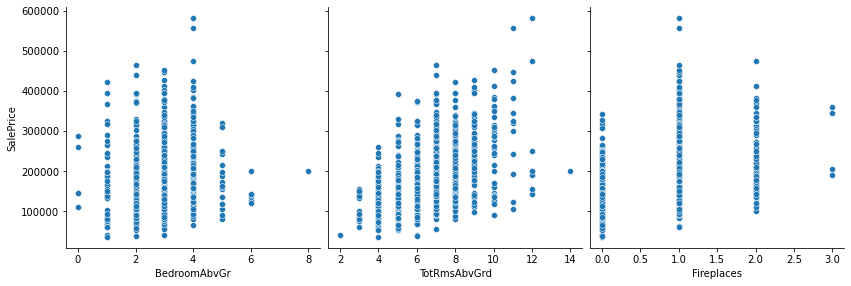

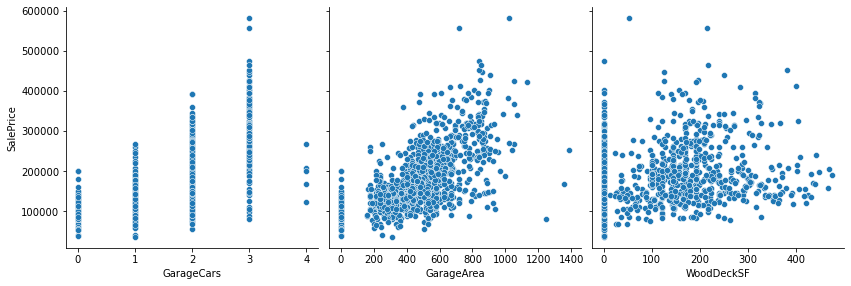

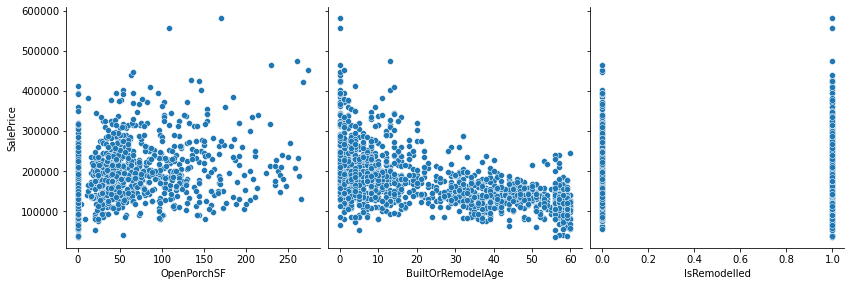

In [36]:
# Checking the numerical variable values Vs 'Sale price'  using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OpenPorchSF','BuiltOrRemodelAge','IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

From the above plots, it is understood that sale price inceases with increase in 1stFlrSF, 2ndFlrSF, GrLivArea, TotalBsmtSF. The values of remaining variables against Sale price is very much scattered. we can see the relationship with the variables in the further analysis.

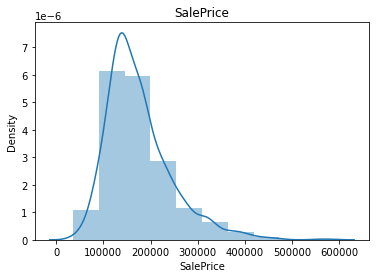

In [37]:
# Visualise the target variable (SalePrice) distribution
plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

From the above plot, it is understood that Sale price of most of properties are in the range of 100000 to 200000.

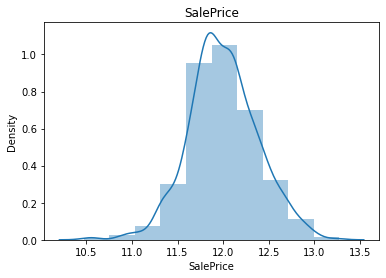

In [38]:
# Visualising the target variable(SalePrice) after transforming the sales priceing

house['SalePrice'] = np.log1p(house['SalePrice'])
plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()

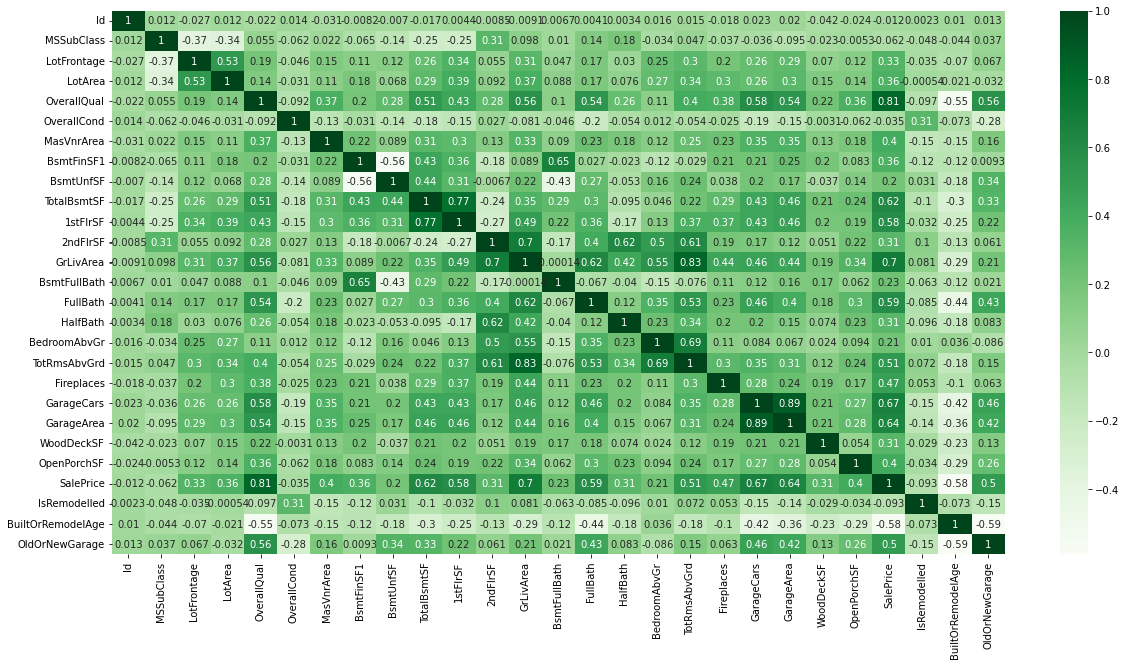

In [39]:
plt.figure(figsize = (20, 10))
sns.heatmap(house.corr(), annot = True, cmap="Greens")
plt.show()

Observation: Some of the variables have high correlation with each other.

-CarageArea and GarageCars with 0.89

-GrLivArea and TotRmsAbvGrd with 0.83

-1stFlrSF and TotalBsmtSF with 0.77

##### Removing the variable columns which show high correlation as shown above

Based on the below correlation, TotRmsAbvGr and GarageCars are dropped

-CarageArea and GarageCars with 0.89
-GrLivArea and TotRmsAbvGrd with 0.83

In [40]:
# Removing the highly correlated variables 'TotRmsAbvGrd' and'GarageArea'

house.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [41]:
house.shape

(1386, 47)

### 3.Preparing the data for modelling

Converting the categorical variable data into numerical data and Creating dummies

In [42]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

house['d_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['d_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['d_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house['d_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house['d_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house['d_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house['d_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house['d_Fence'] = house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house['d_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house['d_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house['d_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [43]:
# dropping the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

house = house.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [44]:
# Creating dummies for the columns

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(house['MSZoning'], prefix='MSZoning', drop_first = True)
house = pd.concat([house, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(house['Neighborhood'], prefix='Neighborhood', drop_first = True)
house = pd.concat([house, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(house['RoofStyle'], prefix='RoofStyle', drop_first = True)
house = pd.concat([house, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(house['Exterior1st'], prefix='Exterior1st', drop_first = True)
house = pd.concat([house, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(house['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house = pd.concat([house, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(house['Foundation'], prefix='Foundation', drop_first = True)
house = pd.concat([house, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, d_GarageType], axis = 1)

house.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [45]:
# dropping the below columns as we have new columns derived from these columns

house = house.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)
house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [46]:
# Checking whether values of all columns are numerical
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 531.9 KB


### Splitting the data into Train and Test data

In [47]:
# Grouping all feature variables to X leaving target variable (Sale price)

X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [48]:
# Assigning response variable to y

y = house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Scaling the feature

In [49]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [50]:
# Splitting the data into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)


### 4. Model building and evaluation

#### Recursive Feature elimination (RFE)

As there are 111 features and some of them are closely correlated, we can use RFE to get best 50 features out of the 111 features for further analysis

In [51]:
# Getting top 50 variables which are impacting the Sale price using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 50)            
rfe = rfe.fit(X_train, y_train)

In [52]:
# Assigning the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assigning the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,BsmtUnfSF,True,1
6,TotalBsmtSF,True,1
7,1stFlrSF,True,1
8,2ndFlrSF,True,1
9,GrLivArea,True,1


In [53]:
# Assigning the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [54]:
# Associating the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
# X_test =  X_test[X_train.columns]
X_test =  X_test[X_train_rfe.columns]


#### For understanding purpose, Linear regression is performed as an optional

In [55]:
# Initiating the linear regression
lm = LinearRegression()

# Fitting a line
lm.fit(X_train, y_train)

LinearRegression()

In [56]:
# Printing the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.99993050176068
[-0.02605292  0.0198312   0.0790309   0.04323246  0.02131433 -0.01018962
  0.06020809  0.01095996  0.00835005  0.09246223  0.01267496  0.01454122
  0.01497196  0.03700061  0.01286863 -0.01537346 -0.02322967  0.012541
  0.01469451  0.01253867  0.01201774  0.01180665  0.01890372  0.01054058
  0.01460355  0.01482369  0.06698677  0.03394097  0.10557684  0.06578308
  0.01705149  0.02343977  0.0218473   0.01700693 -0.01060853  0.0108558
 -0.02379212 -0.02211701  0.0224881   0.01473969 -0.01107643  0.02391581
  0.04538652  0.01821678  0.00897741  0.05325528  0.00749275  0.02683347
  0.04570988  0.01878355]


In [57]:
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.927897775545343
0.8914754773283508
10.006805299785482
6.5539169982518
0.010316294123490187
0.015754608168874522


### Ridge and Lasso Regression

As per the problem statment, we will predict house prices using Ridge and Lasso regression methods.

### Ridge Regression

In the Ridge regression method, feature eliminations are not done. it retains all the features/variables

In [59]:
# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# display the mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
22,20,-0.074724,-0.081976,1
23,50,-0.075360,-0.082013,2
21,10.0,-0.074429,-0.082074,3
20,9.0,-0.074395,-0.082090,4
19,8.0,-0.074359,-0.082107,5
18,7.0,-0.074320,-0.082125,6
17,6.0,-0.074287,-0.082146,7
16,5.0,-0.074251,-0.082170,8
15,4.0,-0.074213,-0.082199,9
14,3.0,-0.074173,-0.082250,10


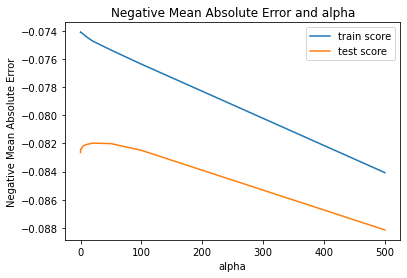

In [61]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [62]:
# get the best estimator for lambda

print(ridge_model_cv.best_params_)

{'alpha': 20}


In [63]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.02524042  0.01887323  0.07869568  0.04339483  0.02455275 -0.00597136
  0.05411759  0.03383399  0.03222517  0.06338292  0.01314952  0.01607283
  0.01570756  0.03392546  0.01284915 -0.01630261 -0.02373764  0.01224607
  0.01516048  0.01242166  0.01196826  0.01373924  0.01937298  0.0106923
  0.01456994  0.01659407  0.04139849  0.02027723  0.05754164  0.02237086
  0.0164211   0.0228175   0.02114655  0.01631801 -0.01010664  0.01146915
 -0.01300122 -0.01928432  0.01205585  0.01179444 -0.01082047  0.01760133
  0.03950457  0.01540686  0.00579555  0.02990507  0.00113849  0.01548787
  0.02329776  0.00665131]


In [64]:
# Calculating metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9267495098499454
0.8895935478614759
10.166168916278242
6.667568818308907
0.010480586511627053
0.01602780965939641


In [65]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE : 0.12660098601273376


In [66]:
# showing the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0252
1,LotArea,0.0189
2,OverallQual,0.0787
3,OverallCond,0.0434
4,BsmtFinSF1,0.0246
5,BsmtUnfSF,-0.0060
6,TotalBsmtSF,0.0541
7,1stFlrSF,0.0338
8,2ndFlrSF,0.0322
9,GrLivArea,0.0634


#### Performing RFE to minimize the feature to 10

In [67]:
# Perfomring RFE to minimise the features to 10
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select = 10)            
rfe = rfe.fit(X_train_ridge, y_train)

In [68]:
# Getting the coefficient values
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(5), index = X_train.columns))

def find(x):
    return ridge_coeff_dict[x]

# Assigning top 10 features to a temp dataframe for further display

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,0.07870
4,GrLivArea,True,1,0.06338
8,MSZoning_RL,True,1,0.05754
3,TotalBsmtSF,True,1,0.05412
1,OverallCond,True,1,0.04339
7,MSZoning_FV,True,1,0.04140
9,Foundation_PConc,True,1,0.03950
5,GarageCars,True,1,0.03393
2,BsmtFinSF1,True,1,0.02455
6,BuiltOrRemodelAge,True,1,-0.02374


### Lasso Regression

In the Lasso regression method, feature eliminations are done. it reduces the number of features/variables by making some of coefficeints to zero.

In [69]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.001}


In [71]:
# cv_results
lasso_model_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_model_cv_results = lasso_model_cv_results[lasso_model_cv_results['param_alpha']<=1]
lasso_model_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010172,0.000747,0.001396,4.885000e-04,0.0001,{'alpha': 0.0001},-0.084340,-0.081111,-0.085939,-0.079354,...,-0.082501,0.002349,6,-0.073252,-0.075108,-0.073202,-0.075081,-0.074074,-0.074143,0.000836
1,0.008976,0.001784,0.001596,4.882080e-04,0.0002,{'alpha': 0.0002},-0.084083,-0.080888,-0.085735,-0.079538,...,-0.082468,0.002214,5,-0.073337,-0.075174,-0.073317,-0.075162,-0.074134,-0.074225,0.000825
2,0.008878,0.001852,0.000997,1.507891e-07,0.0003,{'alpha': 0.0003},-0.083829,-0.080664,-0.085326,-0.079728,...,-0.082360,0.002038,4,-0.073424,-0.075296,-0.073439,-0.075255,-0.074198,-0.074322,0.000827
3,0.008377,0.002410,0.000998,5.519789e-07,0.0004,{'alpha': 0.0004},-0.083580,-0.080501,-0.085097,-0.079919,...,-0.082304,0.001918,3,-0.073536,-0.075426,-0.073581,-0.075367,-0.074257,-0.074434,0.000827
4,0.007380,0.002327,0.001396,4.886166e-04,0.0005,{'alpha': 0.0005},-0.083427,-0.080360,-0.084990,-0.079911,...,-0.082235,0.001897,2,-0.073660,-0.075561,-0.073713,-0.075483,-0.074336,-0.074550,0.000828


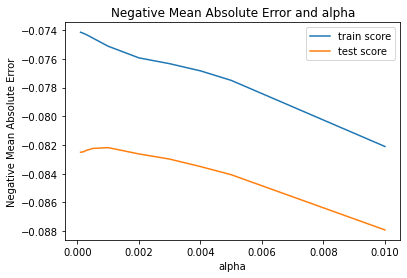

In [72]:
# plotting mean test and train scoes with alpha 

lasso_model_cv_results['param_alpha'] = lasso_model_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_train_score'])
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [73]:
# At alpha = 0.001, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.02321416,  0.01725939,  0.08370264,  0.04403495,  0.02637449,
       -0.00381559,  0.05408777,  0.00433156,  0.        ,  0.10216657,
        0.01271929,  0.01322638,  0.01382621,  0.03465287,  0.01225819,
       -0.01605975, -0.02399044,  0.0108136 ,  0.01197865,  0.01253989,
        0.01066622,  0.01319953,  0.01864128,  0.01069125,  0.01192019,
        0.01682197,  0.03635002,  0.01572543,  0.04909312,  0.01165464,
        0.01515745,  0.02097295,  0.01997116,  0.01440404, -0.00946263,
        0.01187984, -0.        , -0.01323249,  0.        ,  0.00499581,
       -0.01050003,  0.01250639,  0.03607298,  0.01292584,  0.00364218,
        0.01571675, -0.00099393,  0.00874801,  0.00839599, -0.        ])

The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [74]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)


0.9255500639473355
0.889405140290621
10.332635647448114
6.678946961707533
0.010652201698400117
0.01605516096564311


In [75]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE : 0.12670896166271392


In [76]:
# shortlisting Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0232
1,LotArea,0.0173
2,OverallQual,0.0837
3,OverallCond,0.0440
4,BsmtFinSF1,0.0264
5,BsmtUnfSF,-0.0038
6,TotalBsmtSF,0.0541
7,1stFlrSF,0.0043
8,GrLivArea,0.1022
9,BsmtFullBath,0.0127


In [77]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.02321415905600625,
 'LotArea': 0.017259394370862758,
 'OverallQual': 0.08370264374701966,
 'OverallCond': 0.044034948721599576,
 'BsmtFinSF1': 0.02637448996775929,
 'BsmtUnfSF': -0.003815589174567855,
 'TotalBsmtSF': 0.05408777023396574,
 '1stFlrSF': 0.004331559129654171,
 '2ndFlrSF': 0.0,
 'GrLivArea': 0.10216657290034369,
 'BsmtFullBath': 0.012719292619379001,
 'FullBath': 0.013226376923646838,
 'HalfBath': 0.013826207491929752,
 'GarageCars': 0.0346528680627286,
 'WoodDeckSF': 0.012258192356201238,
 'IsRemodelled': -0.01605974554720497,
 'BuiltOrRemodelAge': -0.02399044399506753,
 'OldOrNewGarage': 0.010813601554230669,
 'd_BsmtQual': 0.011978648833711483,
 'd_BsmtExposure': 0.012539893904128947,
 'd_HeatingQC': 0.010666223566636882,
 'd_KitchenQual': 0.013199530941182994,
 'd_FireplaceQu': 0.018641282962371566,
 'd_GarageFinish': 0.010691248687449379,
 'd_HouseStyle': 0.011920187953435708,
 'd_SaleCondition': 0.016821967442422165,
 'MSZoning_FV': 0.036350023155375

### RFE

In [78]:
# Do an RFE to minimise the features to 10

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select = 10)            
rfe = rfe.fit(X_train_lasso, y_train)

In [79]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assigning top 10 features to a temp2 dataframe for further display

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
4,GrLivArea,True,1,0.102167
0,OverallQual,True,1,0.083703
3,TotalBsmtSF,True,1,0.054088
8,MSZoning_RL,True,1,0.049093
1,OverallCond,True,1,0.044035
7,MSZoning_FV,True,1,0.036350
9,Foundation_PConc,True,1,0.036073
5,GarageCars,True,1,0.034653
2,BsmtFinSF1,True,1,0.026374
6,BuiltOrRemodelAge,True,1,-0.023990


The above features/variables displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.

In [80]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Ridge Regression,Lasso Regression
0,0.926750,0.925550
1,0.889594,0.889405
2,10.166169,10.332636
3,6.667569,6.678947
4,0.102375,0.103210
5,0.126601,0.126709


### 5. Inference :

Optimal Lambda value for Ridge and Lasso models are given below:

Ridge model : 20,   Lasso model : 0.001

Mean Squared errors for Ridge and Lasso models are given below:

Ridge model : 0.01266,  Lasso model : 0.01267

The Mean Squared Error of Ridge and Lasso is almost same.

However, since Lasso helps in feature reduction (as the coefficient value of some of the feature became 0), Lasso is better than Ridge.

The top ten variables which have impact on the target variable of Lasso model are shown above.

In the Lasso model, the variables/features which have high impact on the Sale price of houses are Living area, Overall quality, Overall condition, Total basement area, Zone classification, Foundation type, Car Garage area to accommodate cars, Basement finished area and house built/remodelled year.

